The main objective of the program is to analyse kaggle dataset and find a suitable solution for the Kaggle challenge.

**Task**  : To find places where they should build 5 (of the same size) emergency stations.Note that ambulances were sent
only to EMS problems.

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans,DBSCAN,OPTICS
import matplotlib.pyplot as plt
import re
import seaborn as sns
from datetime import *
#from sklearn_extra.cluster import KMedoids
#from pyclustering.cluster.kmedoids import kmedoids
import geopy.distance
from mpl_toolkits.basemap import Basemap

In [26]:
df_main=pd.read_csv(r'S:\kaggletask\tz2.csv', header=0,thousands=',')

df=df_main.copy()

print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title         timeStamp                twp  e  
0  19525.0   EMS: BACK PAINS/INJURY  10-12-2015 17:40        NEW HANOVER  1  
1  19446.0  EMS: DIABETIC EMERGENCY  10-12-2015 17:40  HATFIELD TOWNSHIP  1  
2  19401.0      Fire: GAS-ODOR/LEAK  10-12-2015 17:40         NORRISTOWN  1  
3  19401.0   EMS: CARDIAC EMERGENCY  10-12-2015 17:40         NORRISTOWN  1  
4      NaN           EMS: DIZZINESS  10-12-2015 17:40   LOWER POTTSGROVE  1  


The dataset is obtained from the link : https://www.kaggle.com/mchirico/montcoalert


In [27]:
df['Reason']=df['title'].str.split(':', expand=True)[0]
df['inputtime']=df['desc'].str.extract('(....-..-.. @ ..:..:..)', expand=True)
df['inputtime']=df['inputtime'].str.replace('@','').str.strip()
df[['desc1','desc2','desc3']]=df['desc'].str.split(';', expand=True, n=2)
df['station']=df['desc3'].str.replace('(....-..-.. @ ..:..:..)', '')
df['station']=df['station'].str.replace("-", '').str.replace(";", '').str.strip()
df['inputtime']=pd.to_datetime(df['inputtime'], format='%Y-%m-%d  %H:%M:%S')
df['timeStamp']=pd.to_datetime(df['timeStamp'], format='%d-%m-%Y %H:%M',errors='coerce')
df['timeelapsed'] = pd.DataFrame((df['inputtime'] - df['timeStamp']).dt.total_seconds(),columns=['timeleapsed'])
df['hour']=df['inputtime'].dt.hour
df['month']=df['inputtime'].dt.month
df['dayofweek']=df['inputtime'].dt.day_name()
dayHour = df.groupby(by=['dayofweek','hour']).count()['Reason'].unstack()

Additional data derived for better understanding

In [28]:
df=df[df['Reason']=='EMS']

df = df.drop_duplicates().reset_index(drop=True)

df= df[(df['lat']>35) & (df['lat']<43)]

df= df.dropna().reset_index(drop=True)

Since we are concentrating only on EMS problems, rows containing EMS are selected. 

At present we are restricting the latitide between 35 and 43 to remove outliers (places which represent from different state). Investigating further to use algorithms like DBSCAN or OPTICS to perform similar task with more consistancy and better limits

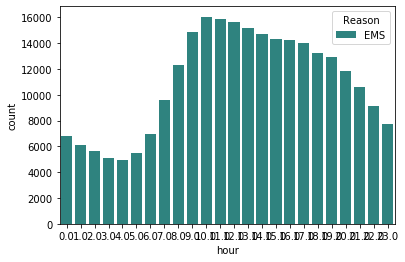

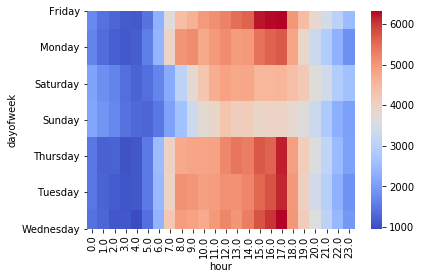

In [29]:
# Data visualisations

#sns.countplot(x='Reason',data=df,palette='viridis')
#sns.lmplot(x='lat',y='lng',data=df,fit_reg=False,   hue='Reason',scatter_kws={"s": 5})
#sns.boxplot(data=df[['lat','lng']])
#plt.figure(1)
#sns.countplot(x='dayofweek',data=df,hue='Reason',palette='viridis')
plt.figure(2)
sns.countplot(x='hour',data=df,hue='Reason',palette='viridis')
#plt.figure(3)
#sns.countplot(x='month',data=df,hue='Reason',palette='viridis')
plt.figure(4)
sns.heatmap(dayHour,cmap='coolwarm')


#fig, axes = plt.subplots(figsize=(9,12))
#axes.scatter(df.lng, df.lat, s=0.1, alpha=0.5, c='r')
#plt.show()




The above plots show the frequency of calls during different hour of the day and during different days of the week respectively. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


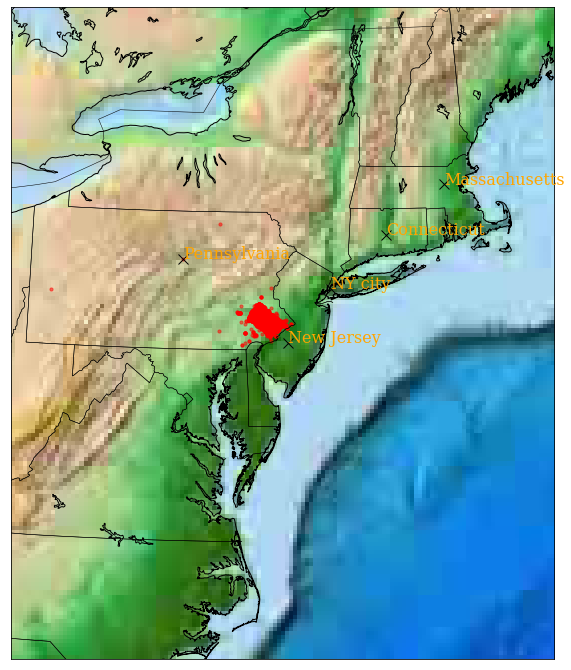

In [30]:
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution='h',lat_0=40, lon_0=-75, width=1E6, height=1.2E6)
#m = Basemap(resolution='h',llcrnrlon=df['lng'].min(),llcrnrlat=df['lat'].min(),urcrnrlon=df['lng'].max(),urcrnrlat=df['lat'].max())
#m.shadedrelief()
m.etopo()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawstates(color='black')
m.scatter(df['lng'].values, df['lat'].values, latlon=True,c='red',s=10,cmap='Reds', alpha=0.5)
lons = [-77.194527, -73.935242, -74.871826,-71.382439,-72.699997]
lats = [ 41.203323, 40.730610, 39.833851,42.407211,41.599998]
x,y = m(lons, lats)
m.plot(x, y, 'kx', markersize=10)
 
labels = ['Pennsylvania', 'NY city', 'New Jersey','Massachusetts','Connecticut']
font = {'family': 'serif',
        'color':  'orange',
        'weight': 'normal',
        'size': 16,
        }
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt, ypt, label,fontdict=font)

The basemap library allows to plot the actual location of the coordinates and visualise the data better. 

In [31]:
df_cluster= df[['lat','lng']]


In [32]:
#dbscan = DBSCAN(eps=10, min_samples=100, algorithm='ball_tree', metric='haversine').fit(df_cluster.values)
#dbscanlabel=dbscan.labels_

In [33]:
#optics = OPTICS(min_samples=1000).fit(df_cluster.values)
#opticslabel=optics.labels_

In [34]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_cluster.values)
labeltitle='labels'

label = pd.DataFrame(kmeans.labels_,columns=[labeltitle])
centres= kmeans.cluster_centers_

cluster= pd.concat([df,label],axis=1)
 

The idea is to cluster using latitude and longitude as features using K means algorithm as it uses distance metric like eucleadian diastance and group clusters closest to each other. The centres of these clusers can be the location for emergency centres. Working on adding more features to make it more practical.

Amount of points in each cluster
35905
46433
49164
67274
64455


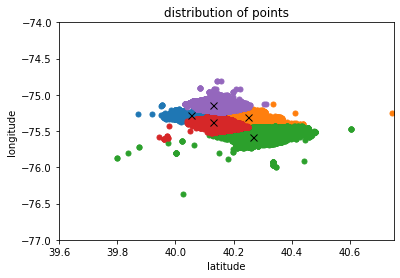

In [35]:
axs=plt.figure()
plt.title('distribution of points')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.xlim([39.6,40.75])
plt.ylim([-77,-74])
#for i in range(max(dbscanlabel)):
 #   plt.plot(cluster[cluster[labeltitle]==i]['lat'], cluster[cluster[labeltitle]==i]['lng'], 'o', markersize=5)
for i in range(5):
    plt.plot(cluster[cluster[labeltitle]==i]['lat'], cluster[cluster[labeltitle]==i]['lng'], 'o', markersize=5)
     
print("Amount of points in each cluster")
   
for i in range(5):   
    plt.plot(centres[i][0],centres[i][1], 'xk', markersize=7)
    print(len(cluster[cluster[labeltitle]==i]))
    

#for i in range(5):
#    plt.plot(cluster[cluster[labeltitle]==i]['lat'],cluster[cluster[labeltitle]==i]['lng'], 'o',markersize=5)

# def finddist(coords_1,coords_2):
#     return(geopy.distance.vincenty(coords_1, coords_2).km)


# distance=[]
# for i in range(5): 
#     X =pd.DataFrame([cluster[cluster[labeltitle]==i]['lat'], cluster[cluster[labeltitle]==i]['lng']]).transpose()
#     coords_2 = (centres[i][0],centres[i][1])
#     for index,row in X.iterrows():
#         finddist(X,coords_2)
